<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.9.0+cpu


'cpu'

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms

# Import MNIST training dataset
train_dataset = torchvision.datasets.MNIST(
    root='.',
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

# Import MNIST test dataset
test_dataset = torchvision.datasets.MNIST(
    root='.',
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

In [ ]:
# Print information about the training and testing dataset
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
# Train dataset shape
train_img, train_label = train_dataset[0]
print(f'Shape of train dataset image: {train_img.shape}')
print(f'Train dataset label: {train_label}')

test_img, test_label = test_dataset[0]
print(f'Shape of test dataset image: {test_img.shape}')
print(f'Test dataset label: {test_label}')

Shape of train dataset image: torch.Size([1, 28, 28])
Train dataset label: 5
Shape of test dataset image: torch.Size([1, 28, 28])
Test dataset label: 7


In [ ]:
# Class of Dataset
classes = train_dataset.classes

## 6. Visualize at least 5 different samples of the MNIST training dataset.

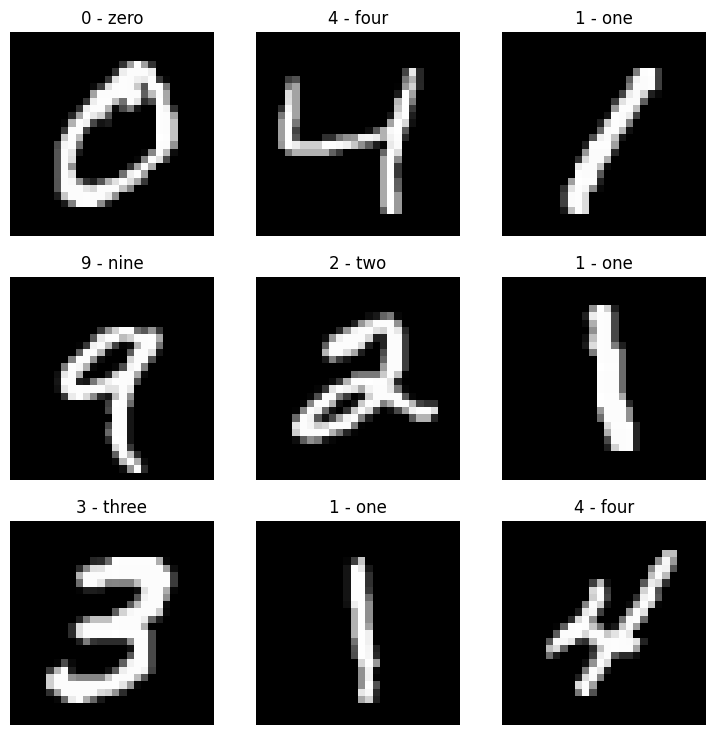

In [ ]:
import matplotlib.pyplot as plt

# Print out random samples in the training dataset and its corresponding labels
rows, cols = 3, 3
figure = plt.figure(figsize=(9, 9))
for i in range(1, rows*cols+1):
  image, label = train_dataset[i]
  figure.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(dim=0), cmap='gray')
  plt.title(classes[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data import DataLoader
# Set number of batch size
BATCH_SIZE = 32

# Load training dataset
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Load testing dataset
test_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

# Print information about the training and testing dataset
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ab93101b320>,
 <torch.utils.data.dataloader.DataLoader at 0x7ab93209ce00>)

In [ ]:
# Print information about a batch of data in the training dataloader
image, label = next(iter(train_dataloader))
print(f'Shape of each batch of data in the training dataloader: {image.shape}')
print(f'Shape of each data in a batch for a training dataloader: {image[1].shape}')

Shape of each batch of data in the training dataloader: torch.Size([32, 1, 28, 28])
Shape of each data in a batch for a training dataloader: torch.Size([1, 28, 28])


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn

# Define the TinyVGG model
class MNISTModelV0(nn.Module):
  def __init__(self, in_shape: int, hidden_units: int, out_shape: int):
    super().__init__()
    self.conv_layer_1 = nn.Sequential(
        nn.Conv2d(in_channels=in_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1,),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_layer_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1,),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=out_shape),
    )

  def forward(self, x):
    x = self.conv_layer_1(x)
    x = self.conv_layer_2(x)
    x = self.classifier(x)
    return x

model_0 = MNISTModelV0(in_shape=1, hidden_units = 10, out_shape=10).to(device)
model_0

MNISTModelV0(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Print information about model 0's parameters and its values
model_0.state_dict()

OrderedDict([('conv_layer_1.0.weight',
              tensor([[[[-0.2651,  0.1854, -0.0907],
                        [ 0.0289, -0.2226, -0.3275],
                        [ 0.2128, -0.1856,  0.0030]]],
              
              
                      [[[ 0.2444, -0.1780, -0.0936],
                        [ 0.2186,  0.2188, -0.0032],
                        [ 0.2070,  0.2743,  0.2564]]],
              
              
                      [[[ 0.0217,  0.0796, -0.0055],
                        [ 0.0882, -0.2341, -0.3299],
                        [-0.0909, -0.0792,  0.0593]]],
              
              
                      [[[-0.1774, -0.0844,  0.2697],
                        [-0.2360,  0.2792,  0.2869],
                        [-0.0735,  0.0927,  0.1005]]],
              
              
                      [[[ 0.1422, -0.0936,  0.2472],
                        [-0.1634,  0.2183,  0.3047],
                        [ 0.1766, -0.0316,  0.1454]]],
              
              
      

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

# Define an accuracy function
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
import time
from tqdm.auto import tqdm

# Set number of epochs
epochs = 5

start_time = time.perf_counter()
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}')
  train_loss = 0
  for batch_idx, (train_image, train_label) in enumerate(train_dataloader):
    # Put data on target device
    train_image, train_label = train_image.to(device), train_label.to(device)

    ### Training
    model_0.train()

    # Do the forward pass
    y_train_logits = model_0(train_image)

    # Calculate the loss
    loss = loss_fn(y_train_logits, train_label)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

  total_loss = train_loss/batch_idx

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    test_loss = 0
    test_accuracy = 0
    for batch_idx, (test_image, test_label) in enumerate(test_dataloader):
      # Forward pass
      y_test_logits = model_0(test_image)

      # Compute test labels
      y_test_labels = torch.sigmoid(y_test_logits).argmax(dim=1)

      # Compute accuracy and loss
      loss = loss_fn(y_test_logits, test_label)
      accuracy = accuracy_fn(test_label, y_test_labels)
      test_loss += loss
      test_accuracy += accuracy

    # Compute average test loss and test accuracy
    test_loss = test_loss/batch_idx
    test_accuracy = test_accuracy/batch_idx

    # Print out results
    print(f'Loss: {total_loss:.4f} | Test loss: {test_loss:.4f} | Test accuracy: {test_accuracy:.2f}')

end_time = time.perf_counter()
print(f'Total time on {device} is {end_time-start_time} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
Loss: 0.0858 | Test loss: 0.0862 | Test accuracy: 97.24
Epoch: 1
Loss: 0.0645 | Test loss: 0.0541 | Test accuracy: 98.32
Epoch: 2
Loss: 0.0553 | Test loss: 0.0396 | Test accuracy: 98.80
Epoch: 3
Loss: 0.0484 | Test loss: 0.0367 | Test accuracy: 98.89
Epoch: 4
Loss: 0.0430 | Test loss: 0.0469 | Test accuracy: 98.50
Total time on cpu is 431.71278557100004 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

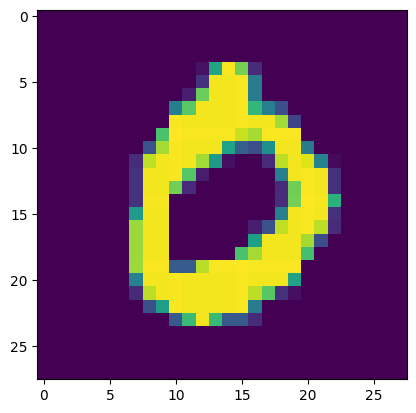

In [ ]:
# Print an example of an image in the testing dataset
plt.imshow(test_dataset[3][0].squeeze(dim=0))

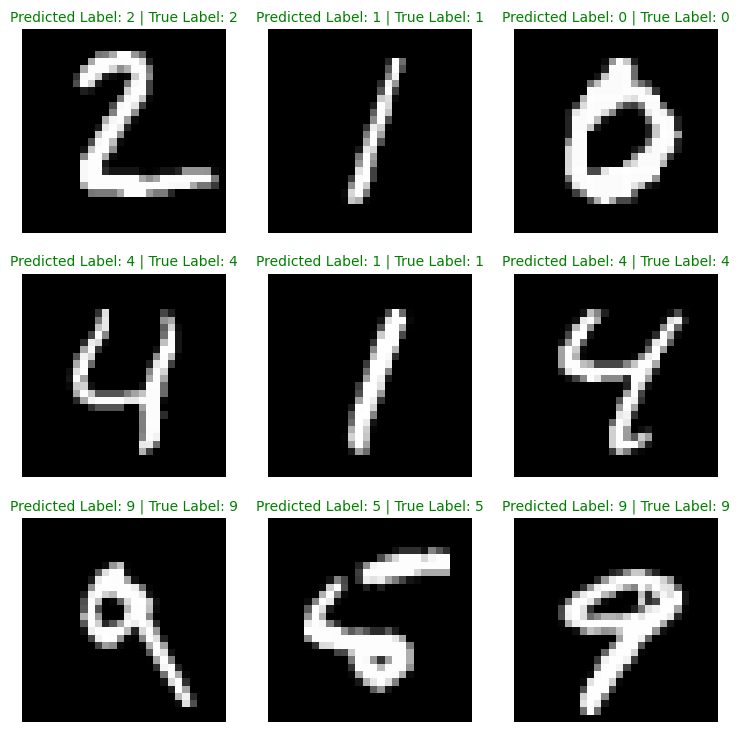

In [ ]:
# Compare the predicted image label and the true image label of images in the testing dataset
model_0.eval()
num_plots = 9
figure = plt.figure(figsize=(9, 9))
for i in range(1, num_plots+1, 1):
  with torch.inference_mode():
    figure.add_subplot(3, 3, i)
    image, label = test_dataset[i]
    y_pred = model_0(test_dataset[i][0].unsqueeze(dim=1))
    plt.imshow(test_dataset[i][0].squeeze(dim=0), cmap='gray')
    plt.axis(False)
    if int(y_pred.argmax(dim=1)) == test_dataset[i][1]:
      plt.title(f'Predicted Label: {int(y_pred.argmax(dim=1))} | True Label: {test_dataset[i][1]}', c='g', fontsize=10)
    else:
      plt.title(f'Predicted Label: {int(y_pred.argmax(dim=1))} | True Label: {test_dataset[i][1]}', c='r', fontsize=10)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
import torch
from torch import nn

# Create a random tensor of shape [1, 3, 64, 64]
random_tensor = torch.randn(size=[1, 3, 64, 64])

# Define a convolutional layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 1,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Run the random tensor through the convolutional layer
print(f'Shape of Random Tensor after Conv Layer: {conv_layer(random_tensor).shape}')

Shape of Random Tensor after Conv Layer: torch.Size([1, 1, 64, 64])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
import torchvision
from torchvision import datasets
from torchvision import transforms

# Download the training and testing dataset for FashionMNIST
train_dataset = datasets.FashionMNIST(
    root='.',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

test_dataset = datasets.FashionMNIST(
    root='.',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)
train_dataset, test_dataset

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 204kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.78MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.4MB/s]


(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
# Check shapes of train dataset
train_image, train_label = train_dataset[0]
print(f'Shape of each tensor in train dataset: {train_image.shape}')

# Check shapes of test dataset
test_image, test_label = test_dataset[0]
print(f'Shape of each tensor in test dataset: {test_image.shape}')

Shape of each tensor in train dataset: torch.Size([1, 28, 28])
Shape of each tensor in test dataset: torch.Size([1, 28, 28])


In [ ]:
# Create classes object for FashionMNIST
classes = train_dataset.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

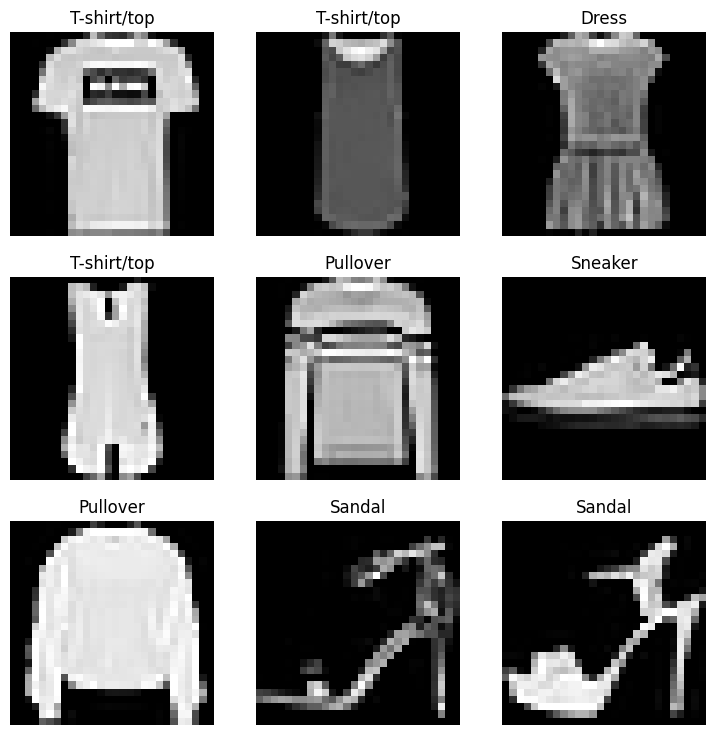

In [ ]:
# Visualize 9 examples of the training dataset
import matplotlib.pyplot as plt

num_cols, num_rows = 3, 3
figure = plt.figure(figsize=(9, 9))
for i in range(1, num_cols*num_rows + 1, 1):
  train_image, train_label = train_dataset[i]
  figure.add_subplot(num_cols, num_rows, i)
  plt.imshow(train_image.squeeze(dim=0), cmap='gray')
  plt.axis(False)
  plt.title(f'{classes[train_label]}')

In [ ]:
from torch.utils.data import DataLoader
# Load the training and testing datasets into batches (dataloader)
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=32,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False
)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bd86219a930>,
 <torch.utils.data.dataloader.DataLoader at 0x7bd86227ba10>)

In [ ]:
# Print shapes of train dataloader and test dataloader
train_image, train_label = next(iter(train_dataloader))
print(f'Shape of train image in train dataloader: {train_image.shape}')

test_image, test_label = next(iter(test_dataloader))
print(f'Shape of test image in test dataloader: {test_image.shape}')

Shape of train image in train dataloader: torch.Size([32, 1, 28, 28])
Shape of test image in test dataloader: torch.Size([32, 1, 28, 28])


In [ ]:
import torch
from torch import nn

# Create CNN Class
class FashionMNISTModelV0(nn.Module):
  def __init__(self, in_shape:int, hidden_units:int, out_shape:int):
    super().__init__()
    self.conv_layer_1 = nn.Sequential(
        nn.Conv2d(in_channels = in_shape,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_layer_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=out_shape)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    x = self.conv_layer_1(x)
    x = self.conv_layer_2(x)
    x = self.classifier(x)
    return x

model_1 = FashionMNISTModelV0(in_shape=1, hidden_units=10, out_shape=10)
model_1

FashionMNISTModelV0(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Define loss and optimizer function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)

# Define the accuracy function
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
import time
from tqdm.auto import tqdm

# Set number of epochs
epochs = 5
start_time = time.perf_counter()

### Training and testing loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}')
  train_loss = 0
  for batch_idx, (train_image, train_label) in enumerate(train_dataloader):
    ### Training
    model_1.train()

    # Forward pass
    y_train_logits = model_1(train_image)

    # Calculate the loss
    loss = loss_fn(y_train_logits, train_label)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()
  train_loss = train_loss/batch_idx

  ### Testing
  model_1.eval()
  test_loss = 0
  test_acc = 0
  with torch.inference_mode():
    for batch_idx, (test_image, test_label) in enumerate(test_dataloader):
      # Forward pass
      y_test_logits = model_1(test_image)

      # Calculate prediction labels
      y_test_preds = y_test_logits.argmax(dim=1)

      # Calculate the loss and accuracy
      test_loss += loss_fn(y_test_logits, test_label)
      test_acc += accuracy_fn(test_label, y_test_preds)

  test_loss = test_loss/batch_idx
  test_acc = test_acc/batch_idx

  # Print out what's happening
  print(f'Loss: {loss:.3f} | Test loss: {test_loss:.3f} | Test Accuracy: {test_acc:.2f}')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
Loss: 0.263 | Test loss: 0.357 | Test Accuracy: 87.58
Epoch: 1
Loss: 0.344 | Test loss: 0.336 | Test Accuracy: 88.12
Epoch: 2
Loss: 0.197 | Test loss: 0.316 | Test Accuracy: 89.25
Epoch: 3
Loss: 0.311 | Test loss: 0.331 | Test Accuracy: 88.36
Epoch: 4
Loss: 0.265 | Test loss: 0.325 | Test Accuracy: 88.80


In [ ]:
# Make predictions on the entire test dataset with model_1
model_1.eval()
test_pred = []
with torch.inference_mode():
  for batch_idx, (test_image, test_label) in enumerate(test_dataloader):
    # Forward pass
    test_logits = model_1(test_image)

    # Calculate prediction labels
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_pred.append(test_preds)

# Print out 10 sets of prediction labels
test_pred[:10]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5,
         1, 6, 4, 0, 9, 4, 8, 8]),
 tensor([1, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2,
         8, 4, 8, 0, 7, 7, 8, 5]),
 tensor([1, 1, 4, 4, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
         0, 2, 5, 3, 6, 7, 1, 8]),
 tensor([0, 1, 2, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
         0, 0, 9, 9, 3, 0, 8, 4]),
 tensor([1, 5, 4, 1, 9, 1, 8, 6, 2, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4,
         1, 3, 5, 0, 4, 7, 9, 3]),
 tensor([7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 2, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6,
         7, 9, 9, 4, 4, 7, 1, 2]),
 tensor([1, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 6, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
         1, 6, 7, 2, 8, 5, 3, 0]),
 tensor([7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 6, 9, 2, 2, 8, 6, 4,
         2, 2, 9, 7, 0, 5, 5, 4]),
 tensor([8, 5, 2, 3, 0, 4, 8, 0, 0, 4, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 

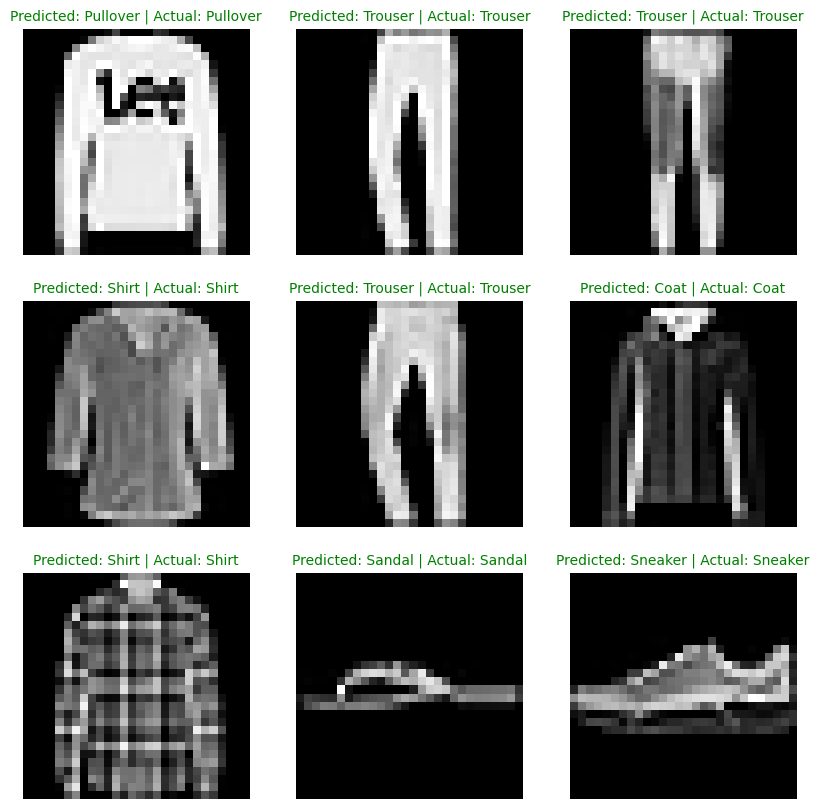

In [ ]:
# Compare predictions with truth labels
num_rows, num_cols = 3, 3
figure = plt.figure(figsize=(10, 10))
for i in range(1, num_rows*num_cols+1, 1):
  image, label = test_dataset[i]
  test_logits = model_1(image.unsqueeze(dim=1))
  test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
  figure.add_subplot(num_rows, num_cols, i)
  plt.imshow(image.squeeze(dim=0), cmap='gray')
  plt.axis(False)
  if test_preds == label:
    plt.title(f'Predicted: {classes[test_preds]} | Actual: {classes[label]}', c='g', fontsize=10)
  else:
    plt.title(f'Predicted: {classes[test_preds]} | Actual: {classes[label]}', c='r', fontsize=10)